<a href="https://colab.research.google.com/github/VedantWani/Swarm-Intelligence/blob/master/Artificial_Bee_Colony.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [0]:
def CostFunction(position):
  total = 0
  
  for i in range(len(position)):
    total+=position[i]**2
  return total
  #return (position[0] - 0.1)**2 + (position[1] - 2)**2;


In [0]:
def fitness(cost):
  fit = cost
  if fit < 0:
      fit = 1 + abs(fit)
  else:
      fit = 1/(1+fit)


  return fit



In [0]:
def BunchPosition():
  tx.append(Swarm[i].position[0])
  ty.append(Swarm[i].position[1])
  tz.append(Swarm[i].position[2])

def updatePosition(tx, ty, tz):
  xs.append(np.array(tx))
  ys.append(np.array(ty))
  zs.append(np.array(tz))
  

In [0]:
def Selection_roulette(fitness):
  P = fitness/sum(fitness)

  rand = np.random.rand()
  cummulsum = np.cumsum(P)

  sh = np.argwhere(rand<=cummulsum)
  random.shuffle(sh)
  
  return random.choice(sh)[0]

   

In [19]:
cummulsum = np.cumsum([0.1,0.2,0.3,0.4])

np.argwhere(0.19<=cummulsum)
sh =np.argwhere(0.09<=cummulsum)
random.shuffle(sh)
random.choice(sh)[0]

1

In [0]:
  class Bee:
    pass

In [0]:
BestSolution = []

In [0]:
gBest = Bee()

In [0]:
gBest.cost = float('inf')

In [0]:
#problem definition


#Dim = 5
varsize = 3

DimMin = -100
DimMax = 100

In [0]:
#PSO Parameters
swarm_size = 100
max_iter = 100
limit = 100

In [0]:
#initialization of swarm
xs = []
ys = []
zs = []
tx = []
ty = []
tz = []

Swarm = []

for i in range(swarm_size):
  bee = Bee()

  bee.position = np.random.uniform(DimMin, DimMax, varsize)
  #costfunction
  bee.cost = CostFunction(bee.position)
  
   #update global

  if bee.cost < gBest.cost:
    gBest.cost = bee.cost
    gBest.position = bee.position
  
  Swarm.append(bee)
  BunchPosition()
updatePosition(tx, ty, tz)
tx,ty,tz = [],[],[]


AC = np.zeros((swarm_size,1))


In [27]:
for it in range(0,max_iter):
  for i in range(0, swarm_size):
    
    #employeed Bee Phase
    randk = list(range(swarm_size))
    randk.remove(i)
    random.shuffle(randk)
    k = random.choice(randk)

    phi = np.random.uniform(-1, 1, varsize)
   

    newbee = Bee()
    #position update
    newbee.position = Swarm[i].position + phi * (Swarm[i].position - Swarm[k].position)

    #fitness calculation

    #valuate fitness
    Swarm[i].cost = CostFunction(Swarm[i].position)
    newbee.cost = CostFunction(newbee.position)

    beeCurrfitness = fitness(Swarm[i].cost)
    newbeefitness = fitness(newbee.cost)
    #greedy selection using fitness and not by cost
    if newbeefitness >= beeCurrfitness:
      Swarm[i].cost = newbee.cost
      Swarm[i].position = newbee.position
      #print(newbee.cost)
    else:
      AC[i] += 1

    BunchPosition()
  updatePosition(tx, ty, tz)
  tx,ty,tz = [],[],[]
  
  #fitness and probabli

  fit = []
  for i in range(0, swarm_size):
    fit.append(fitness(Swarm[i].cost))
  
  
  
 

  #onlooker bee phase
  
  for i in range(0,swarm_size):
    
    selectedBee = Selection_roulette(fit)

    randk = list(range(swarm_size))
    randk.remove(selectedBee)
    random.shuffle(randk)
    k = random.choice(randk)

    phi = np.random.uniform(-1, 1, varsize)
   

    newbee = Bee()
    #position update
    newbee.position = Swarm[selectedBee].position + phi * (Swarm[selectedBee].position - Swarm[k].position)

    #fitness calculation

    #valuate fitness
    Swarm[selectedBee].cost = CostFunction(Swarm[selectedBee].position)
    newbee.cost = CostFunction(newbee.position)

    beeCurrfitness = fitness(Swarm[selectedBee].cost)
    newbeefitness = fitness(newbee.cost)
    #greedy selection using fitness and not by cost
    if newbeefitness >= beeCurrfitness:
      Swarm[selectedBee].cost = newbee.cost
      Swarm[selectedBee].position = newbee.position
    else:
      AC[selectedBee] += 1
    BunchPosition()
  updatePosition(tx, ty, tz)
  tx,ty,tz = [],[],[]    

 #SCout BEe
  for i in range(0, swarm_size):
    if AC[i] >= limit:
      Swarm[i].position = np.random.uniform(DimMin, DimMax, varsize)
      #costfunction
      Swarm[i].cost = CostFunction(bee.position)

      AC[i] = 0
    BunchPosition()
  updatePosition(tx, ty, tz)
  tx,ty,tz = [],[],[]
  
  for i in range(0, swarm_size):
    if Swarm[i].cost < gBest.cost:
      gBest.cost = Swarm[i].cost
      gBest.position = Swarm[i].position

  BestSolution.append(gBest.cost)
  print("Iteration : " +str(it)+" Best COst: "+str(gBest.cost))


Iteration : 0 Best COst: 87.0902251218941
Iteration : 1 Best COst: 87.0902251218941
Iteration : 2 Best COst: 87.0902251218941
Iteration : 3 Best COst: 25.0551347230142
Iteration : 4 Best COst: 12.536055584338634
Iteration : 5 Best COst: 5.422702167380481
Iteration : 6 Best COst: 0.9956519668371111
Iteration : 7 Best COst: 0.9956519668371111
Iteration : 8 Best COst: 0.9956519668371111
Iteration : 9 Best COst: 0.9956519668371111
Iteration : 10 Best COst: 0.9956519668371111
Iteration : 11 Best COst: 0.32908063561731826
Iteration : 12 Best COst: 0.2835175923821719
Iteration : 13 Best COst: 0.22223782159325683
Iteration : 14 Best COst: 0.201615607558087
Iteration : 15 Best COst: 0.1850613801338704
Iteration : 16 Best COst: 0.12381119899929133
Iteration : 17 Best COst: 0.04958447009818766
Iteration : 18 Best COst: 0.04958447009818766
Iteration : 19 Best COst: 0.01452948870401592
Iteration : 20 Best COst: 0.0050342533203152715
Iteration : 21 Best COst: 0.0050342533203152715
Iteration : 22 Bes

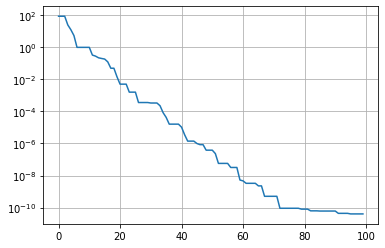

In [28]:
plt.grid()
plt.yscale("log")
plt.plot(BestSolution)

In [29]:
gBest.position

array([-2.20353332e-06, -2.04896464e-06,  5.58054093e-06])

In [30]:
gBest.cost

4.019625220036227e-11

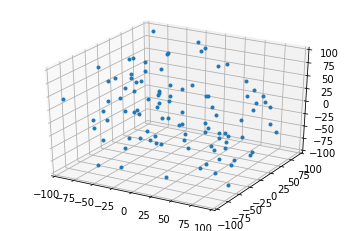

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sct, = ax.plot([], [], [], "o", markersize=3)
def update(ifrm, xa, ya, za):
    #print(ifrm)
    sct.set_data(xa[ifrm], ya[ifrm])
    sct.set_3d_properties(za[ifrm])
ax.set_xlim(-100,100)
ax.set_ylim(-100,100)
ax.set_zlim(-100,100)
ani = animation.FuncAnimation(fig, update, frames=100, fargs=(xs,ys,zs), interval = 100)
HTML(ani.to_html5_video())